In [3]:
import scqubits as scq
import numpy as np
import qutip as qt

In [4]:
Ec = 0.2
EL = 10  # Example value for EL
EJ = 3  # Example value for EJ
phi_ex = 0.25  # Example value for phi_ex
# Set the base flux
fluxonium1 = scq.Fluxonium(
    EJ=EJ,
    EC=Ec,
    EL=EL,
    cutoff = 150,
    flux = phi_ex,
    truncated_dim=5
)

In [5]:
e = fluxonium1.eigenvals()
e-= e[0]

In [6]:
e

array([ 0.        ,  4.13114588,  8.23086788, 12.30413807, 16.35562038,
       20.38956441])

In [7]:
import scqubits as scq
import numpy as np
from scipy.special import factorial
# import autograd.numpy as np
import matplotlib.pyplot as plt
import scipy as sci
from functions import *
def fluxonium_paras(Ec, EL, EJ, phi_ex):
    # Define the potential function
    def potential(phi, EL, EJ, phi_ex):
        return 0.5 * EL * phi**2 - EJ * np.cos(phi - phi_ex)

    # Function to find the minimum
    def find_minimum(EL, EJ, phi_ex, initial_guess=0):
        phi_ex = phi_ex*2*np.pi
        result = sci.optimize.minimize(potential, x0=initial_guess, args=(EL, EJ, phi_ex))
        return result.x  # The value of phi at the minimum

    # Example usage

    phi_min = find_minimum(EL, EJ, phi_ex)
    phi_ex = phi_ex*2*np.pi

    beta = EJ/EL
    sdim = 20
    phi_min = find_minimum(EL,EJ,phi_ex)
    # potential expansion around minimum
    c2 = beta*np.cos(phi_min - phi_ex) + 1
    c3 = -beta*np.sin(phi_min-phi_ex)
    c4 = -beta*np.cos(phi_min-phi_ex)
    c5 = beta*np.sin(phi_min-phi_ex)
    c6 = beta*np.cos(phi_min-phi_ex)
    omega_s = np.sqrt(8*c2*EL*Ec)
    phi_zpf = np.power(2*Ec/(EL*c2),1/4)
    g2 = EL * phi_zpf**2*c2/2
    g3 = EL * phi_zpf ** 3 * c3 / 3 / 2
    g4 = EL * phi_zpf ** 4 * c4 / 4 / 3 /2
    g5 = EL * phi_zpf ** 5 * c5 / 5 / 4 / 3 / 2
    g6 = EL * phi_zpf ** 6 * c6 / 6 / 5 / 4 / 3 / 2
    s = annihilation(sdim)
    sd = creation(sdim)
    x2 = np.matmul(s+sd,s+sd)
    x3 = np.matmul(x2,s+sd)
    x4 = np.matmul(x3,s+sd)
    x5 = np.matmul(x4,s+sd)
    x6 = np.matmul(x5,s+sd)
    phi_op = phi_zpf*(s+sd)+(phi_min)*np.identity(sdim)
    Hs =omega_s * np.matmul(sd,s)- EL*(beta*sci.linalg.cosm(phi_op-(phi_ex)*np.identity(sdim))- 1/2*phi_op@phi_op)- g2*x2

    # print(g3*x3 + g4*x4 )
    Hs =omega_s * np.matmul(sd,s) + g3*x3 + g4*x4 
    charge_op = -1j*(s-sd)/(2*phi_zpf)
    energy0,U = np.linalg.eigh(Hs)
    energy0 = energy0 - energy0[0]
    Ud = U.transpose().conjugate()
    Hs = Ud@Hs@U
    Hs = Hs - Hs[0,0]*np.identity(sdim)
    phase_op, charge_op = Ud@phi_op@U,Ud@charge_op@U
    return Hs,phase_op, omega_s, phi_zpf, g3, g4, g5, g6


In [8]:
beta

NameError: name 'beta' is not defined

In [357]:
fluxonium1.phi_operator(energy_esys=True)

array([[-2.62938614e-01, -4.39761218e-01,  1.14424032e-02,
        -2.56569191e-05, -1.41032596e-04],
       [-4.39761218e-01, -2.14477327e-01,  6.23926346e-01,
        -1.90430247e-02,  9.97035176e-05],
       [ 1.14424032e-02,  6.23926346e-01, -1.68915689e-01,
         7.66263844e-01, -2.57013681e-02],
       [-2.56569191e-05, -1.90430247e-02,  7.66263844e-01,
        -1.26671677e-01,  8.86864930e-01],
       [-1.41032596e-04,  9.97035176e-05, -2.57013681e-02,
         8.86864930e-01, -8.80283032e-02]])

In [358]:
Hs,phase_op, omega_s, phi_zpf, g3, g4, g5, g6 =fluxonium_paras(Ec, EL, EJ, phi_ex)
phase_op

array([[-2.06118940e-01, -4.53958210e-01, -1.52019563e-02,
        -7.37918389e-04, -4.06282192e-05,  2.52234531e-06,
         1.72376852e-07, -1.27916405e-08, -1.01983834e-09,
        -8.70793220e-11,  6.89860622e-12, -2.42359202e-12,
         2.58217809e-12,  3.49241311e-12,  3.87482270e-12,
        -4.01026640e-12,  4.35109394e-12,  5.08981696e-12,
         2.84177843e-12,  6.05920333e-13],
       [-4.53958210e-01, -2.70697729e-01,  6.43044427e-01,
         2.64586380e-02,  1.49206263e-03, -9.23266311e-05,
        -6.31255237e-06,  4.68403493e-07,  3.73539916e-08,
         3.16524617e-09, -3.05700162e-10, -1.19847288e-11,
         6.24869339e-11,  7.69314631e-11,  9.08918716e-11,
        -9.06567500e-11,  8.03682485e-11,  1.48155414e-10,
         1.49513388e-10,  6.42869975e-11],
       [-1.52019563e-02,  6.43044427e-01, -3.35832840e-01,
         7.88850021e-01,  3.75950640e-02, -2.38473846e-03,
        -1.62482671e-04,  1.20626246e-05,  9.61739544e-07,
         8.18863658e-08, -7.0

In [325]:
omega_s

array([3.89472191])

In [200]:
2*np.sqrt(2)*phi_zpf*g3/omega_s

array([-0.06489618])

In [201]:
g5

array([0.00149168])

In [9]:
# result = fluxonium.get_spectrum_vs_paramvals(param_name='flux', param_vals=np.linspace(0,1,100), evals_count=4, subtract_ground=True)
# result.plot_evals_vs_paramvals()

In [10]:
import numpy as np
from functions import *
from scipy.optimize import minimize

# Define the potential function
def potential(phi, EL, EJ, phi_ex):
    return 0.5 * EL * phi**2 - EJ * np.cos(phi - phi_ex)

# Function to find the minimum
def find_minimum(EL, EJ, phi_ex, initial_guess=0):
    phi_ex = phi_ex*2*np.pi
    result = minimize(potential, x0=initial_guess, args=(EL, EJ, phi_ex))
    return result.x  # The value of phi at the minimum

# Example usage

phi_min = find_minimum(EL, EJ, phi_ex)
phi_ex = phi_ex*2*np.pi

beta = EJ/EL
sdim = 20
phi_min = find_minimum(EL,EJ,phi_ex)
# potential expansion around minimum
c2 = beta*np.cos(phi_min - phi_ex) + 1
c3 = -beta*np.sin(phi_min-phi_ex)
c4 = -beta*np.cos(phi_min-phi_ex)
omega_s = np.sqrt(8*c2*EL*Ec)
phi_zpf = np.power(2*Ec/(EL*c2),1/4)
g2 = EL * phi_zpf**2*c2/2
g3 = EL * phi_zpf ** 3 * c3 / 3 / 2
s = annihilation(sdim)
sd = creation(sdim)
x2 = np.matmul(s+sd,s+sd)
phi_op = phi_zpf*(s+sd)+(phi_min)*np.identity(sdim)
Hs =(omega_s * np.matmul(sd,s)- EL*(beta*sci.linalg.cosm(phi_op-(phi_ex)*np.identity(sdim))- 1/2*phi_op@phi_op)- g2*x2)
charge_op = -1j*(s-sd)/(2*phi_zpf)
energy0,U = np.linalg.eigh(Hs)
energy0,U = sort_eigenpairs(energy0, U)
energy0 = energy0 - energy0[0]
Ud = U.transpose().conjugate()
Hs = Ud@Hs@U
Hs = Hs - Hs[0,0]*np.identity(sdim)
phase_op, charge_op = Ud@phi_op@U,Ud@charge_op@U


In [11]:
g3

array([0.04584375])

In [12]:
phase_op

array([[ 2.62938614e-01, -4.39761218e-01, -1.14424032e-02,
        -1.41032596e-04, -2.56569191e-05,  1.84227028e-06,
        -1.11185467e-05,  1.79072092e-08, -5.10709161e-07,
         3.12260814e-09,  1.52040402e-08, -1.71332267e-10,
        -1.50933935e-10, -6.07448008e-12,  2.71150619e-11,
         2.63839963e-11,  5.47814113e-13,  9.89062561e-12,
         4.50963469e-11, -2.71592373e-11],
       [-4.39761218e-01,  2.14477327e-01,  6.23926346e-01,
        -9.97035175e-05,  1.90430247e-02,  2.61654920e-05,
         3.05147712e-04, -1.35149284e-06,  4.71077255e-06,
        -4.49114856e-08,  4.50052633e-08,  6.09461739e-10,
        -9.24384297e-09,  1.24615633e-11, -6.14833457e-10,
        -1.78793035e-10,  2.61849443e-10,  5.85979904e-10,
         3.84157773e-10,  7.61022902e-10],
       [-1.14424032e-02,  6.23926346e-01,  1.68915689e-01,
        -2.57013681e-02,  7.66263844e-01,  5.10196690e-04,
        -2.18224873e-04, -9.15443442e-06, -4.65031446e-05,
         7.86480951e-08,  2.6

In [13]:
2*np.sqrt(2)*g3/omega_s*phi_zpf

array([0.01508882])

In [14]:
phi_min - 6*g3/omega_s

array([-0.24465599])

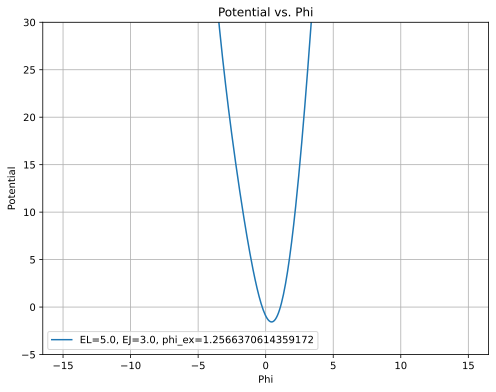

In [15]:
import numpy as np
import matplotlib.pyplot as plt

# Define the potential function
def potential(phi, EL, EJ, phi_ex):
    return 0.5 * EL * phi**2 - EJ * np.cos(phi - phi_ex)

# Set the parameters
EL = 5.0  # Example value for EL
EJ = 3.0  # Example value for EJ
phi_ex = 0.2*2*np.pi # Example value for phi_ex

# Generate a range of phi values
phi_values = np.linspace(-15, 15, 400)

# Calculate the potential for each phi
potential_values = potential(phi_values, EL, EJ, phi_ex)

# Plot the potential
plt.figure(figsize=(8, 6))
plt.plot(phi_values, potential_values, label=f'EL={EL}, EJ={EJ}, phi_ex={phi_ex}')
plt.title('Potential vs. Phi')
plt.xlabel('Phi')
plt.ylabel('Potential')
plt.ylim(-5,30)
plt.grid(True)
plt.legend()
plt.show()


(<Figure size 640x480 with 1 Axes>,
 <Axes: xlabel='$\\varphi$', ylabel='Re $\\psi_j(\\varphi)$,  energy [GHz]'>)

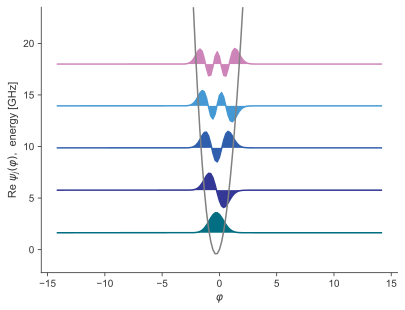

In [16]:
from scqubits.core.discretization import Grid1d
grid = Grid1d(-np.pi/4, np.pi/4, 100)
fluxonium1.plot_wavefunction(-1)

In [17]:
fluxonium = scq.Fluxonium(
    EJ=4.9,
    EC=1.7,
    EL=0.4,
    cutoff = 110,
    flux = 0.5,
    truncated_dim=5
)

fluxonium.eigenvals() - fluxonium.eigenvals()[0]

array([ 0.        ,  0.40955116,  5.58039473,  8.02769749, 11.55391452,
       13.42375774])

In [42]:
# Set the base flux
base_flux = 0.50004
fluxonium.flux = base_flux
h=1e-6
# Compute eigenvalues at the base flux
eigenvals_base = fluxonium.eigenvals() - fluxonium.eigenvals()[0]

# Compute eigenvalues at base_flux + h
fluxonium.flux = base_flux + h
eigenvals_plus = fluxonium.eigenvals() - fluxonium.eigenvals()[0]

# Compute eigenvalues at base_flux - h
fluxonium.flux = base_flux - h
eigenvals_minus = fluxonium.eigenvals() - fluxonium.eigenvals()[0]

# Compute the central difference derivative
derivative = (eigenvals_plus - eigenvals_minus) / (2 * h)

In [43]:
derivative

array([ 0.        ,  0.01812776,  0.00805565,  0.00946138,  0.00618421,
       -0.00719136])

In [44]:
fluxonium.flux = base_flux
fluxonium.tphi_1_over_f_flux(1e-6,1,0)/1e6
# 42319.434199503296

1.9958777457541605

In [46]:
1.794047789571633*0.02016712

0.03618077705802587

In [47]:
1.9958777457541605* 0.01812776

0.036180792764372444

In [54]:
fluxonium.n_operator(energy_esys=True)

array([[0.-1.35402897e-19j, 0.-7.02600741e-02j, 0.+2.28565850e-03j,
        0.+4.75898462e-01j, 0.-6.91312298e-04j],
       [0.+7.02600741e-02j, 0.-3.94608428e-20j, 0.+5.54502688e-01j,
        0.-1.95179416e-03j, 0.-2.04439142e-01j],
       [0.-2.28565850e-03j, 0.-5.54502688e-01j, 0.+2.68562425e-21j,
        0.-4.66099164e-01j, 0.+2.88781923e-04j],
       [0.-4.75898462e-01j, 0.+1.95179416e-03j, 0.+4.66099164e-01j,
        0.-3.57821928e-21j, 0.+8.08550087e-01j],
       [0.+6.91312298e-04j, 0.+2.04439142e-01j, 0.-2.88781923e-04j,
        0.-8.08550087e-01j, 0.-1.65836818e-20j]])

In [55]:
9.37304957*4

37.49219828

In [56]:
fluxonium.n_operator(energy_esys=True)

array([[0.-1.35402897e-19j, 0.-7.02600741e-02j, 0.+2.28565850e-03j,
        0.+4.75898462e-01j, 0.-6.91312298e-04j],
       [0.+7.02600741e-02j, 0.-3.94608428e-20j, 0.+5.54502688e-01j,
        0.-1.95179416e-03j, 0.-2.04439142e-01j],
       [0.-2.28565850e-03j, 0.-5.54502688e-01j, 0.+2.68562425e-21j,
        0.-4.66099164e-01j, 0.+2.88781923e-04j],
       [0.-4.75898462e-01j, 0.+1.95179416e-03j, 0.+4.66099164e-01j,
        0.-3.57821928e-21j, 0.+8.08550087e-01j],
       [0.+6.91312298e-04j, 0.+2.04439142e-01j, 0.-2.88781923e-04j,
        0.-8.08550087e-01j, 0.-1.65836818e-20j]])

(<Figure size 640x480 with 1 Axes>,
 <Axes: xlabel='$\\varphi$', ylabel='Re $\\psi_j(\\varphi)$,  energy [GHz]'>)

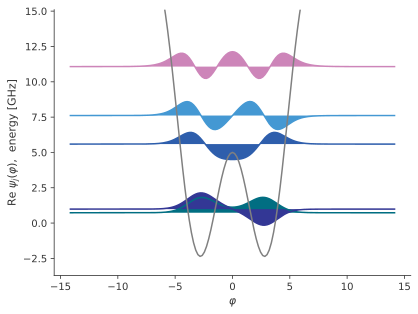

In [57]:
fluxonium.plot_wavefunction(-1)

In [58]:
result = fluxonium.get_spectrum_vs_paramvals(param_name='flux', param_vals=np.linspace(0,1,100), evals_count=4, subtract_ground=True)

Spectral data:   0%|          | 0/100 [00:00<?, ?it/s]

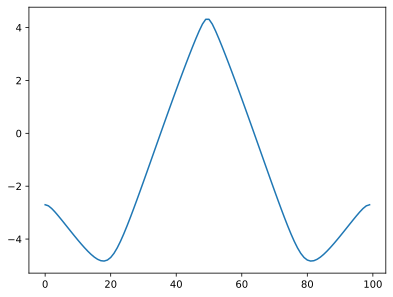

In [59]:
import matplotlib.pyplot as plt
plt.plot((result.energy_table)[:,2]-2*(result.energy_table)[:,1])

(<Figure size 640x480 with 1 Axes>,
 <Axes: xlabel='$\\Phi_{ext}/\\Phi_0$', ylabel='energy [GHz]'>)

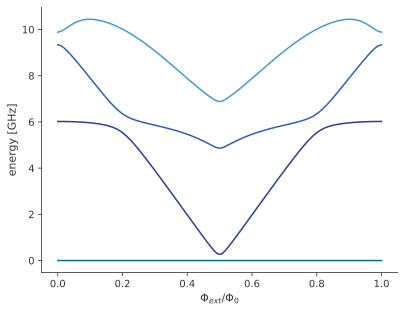

In [60]:
result = fluxonium.get_spectrum_vs_paramvals(param_name='flux', param_vals=np.linspace(0,1,100), evals_count=4, subtract_ground=True)
result.plot_evals_vs_paramvals()